# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives


**E-news Express enhancement Project**

E-news express, is a news website that is keen to expand their business trying to improve their conversion rate and be more profitable in the market and for its stakeholders. The reach that goal they plan to introduce a new version of their website with some changes/improvements that are meant to have a better grasp on customers attention and encourage them to pay for a subscription. The company executives have the thought that the current total monthly subscription is lower than the previous year averae; potentially due a bad design or lack of updated/organized content for the relevant audience. Company plans to analyze and compare the performance of the current version of the website versus the new version that they aim to implement.

**Objectives:**
Test the effectiveness of the old page versus the new version from the conversion rate point of view. We have been hired to explore the data and perform the relevant statistical analysis(at 5% significance level) to determine the effectiveness of the old and new version of the website. For this purpose we have been provided with a data set of 100 randomnly selected subscriber where 50 of them would be tested using the old version of the website(control group), and the remaining 50 will be served with the new version(treatment group).
We are meant to answer below questions and then elaborate on our conclusions: 
1.   Do the users spend more time on the new landing page than on the existing landing page?
2.   Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3.   Does the converted status depend on the preferred language?
4.   Is the time spent on the new page the same for the different language users?

## Import all the necessary libraries

In [231]:
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 
import scipy
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [232]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

#reading dataset with 100 randon sample website users
df = pd.read_csv('/content/drive/MyDrive/Study/MDS_UTexas/2_BusinessStatistics/week4_Project2_eNewsExpress/abtest.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

**Viewing the first and last few rows of the dataset**

In [233]:
#getting first 5 rows from the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [234]:
#getting last 5 rows from the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


**Checking the shape of the dataset**

In [235]:
# Checking shape of the dataset; number of rows and columns in the dataset
print("In the dataset we have: \nrows\t:",df.shape[0],'\ncolumns\t:',df.shape[1])
print(df.shape)

In the dataset we have: 
rows	: 100 
columns	: 6
(100, 6)


**Getting the statistical summary for the variables**

In [236]:
# Getting the statistical summary for the variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


***Statistical summary provides info only for numerical variables:***

*   user_id which is actually a unique ID(no point to analyze it)
*   time_spent_on_the_page which is a very important field in the dataset having a min of 0.19 mins and a max value of 10.71, as we can see the mean and the median are very close values of 5.38 and 5.42 respectivelew which might indicate that data might be symetrically and normally distributed.




**Check for missing values**

In [237]:
from pandas.core.reshape.merge import groupby
#checking for missing/nan/null values
df.info()
print('\n\n')

#checking null values in the dataset
print('Number of null/nan values per column:\n',df.isnull().sum())

#getting a count for each one of the unique values for each categorical field
print('\n\n')
print('getting records count by group')
display(df.groupby(['group'])[['user_id']].count())
print('\n\n')
print('getting records count by landing_page')
display(df.groupby(['landing_page'])[['user_id']].count())
print('\n\n')
print('getting records count by converted')
display(df.groupby(['converted'])[['user_id']].count())
print('\n\n')
print('getting records count by language_preferred')
display(df.groupby(['language_preferred'])[['user_id']].count())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB



Number of null/nan values per column:
 user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64



getting records count by group


,user_id
group,
control,50
treatment,50





getting records count by landing_page


,user_id
landing_page,
new,50
old,50





getting records count by converted


,user_id
converted,
no,46
yes,54





getting records count by language_preferred


,user_id
language_preferred,
English,32
French,34
Spanish,34


**Observations:**
*   As per dataframe info and df.isnull() function; we can observe that there are no missing/nan values in the fields. We can conclude that this is true for the numerical fields(user_id and time_spent_on_the_page), object/string fields will be double checked.
*   group field: we can conclude that there are no missing values for this field and we observe only 2 posible different values(control and treatment) which count a total of 100 observations.
*   landing_page field: we can conclude that there are no missing values for this field and we observe only 2 posible different values(new and old) which count a total of 100 observations.
*   converted field: we also conclude that there are no missing values for this field having 2 possible values(yes and no) summing a total of 100 observations.
*   language_preferred field: no missing values for this field too. There are 3 possible values(English, French and Spanish) having a total count of 100 observations.
*  **In summary we can say that there are no missing values in the dataset**







**Check for duplicates**

In [238]:
#checking for duplicated entries in the dataset
df.duplicated().sum()

0

**Observations:**
We can conclude that there are no duplicated observations in the dataset

### Univariate Analysis

**user_id**

In [239]:
#check uniqueness of user_id field. We are expecting the account of records is equal to the count of unique user_id
print('unique users is: ',df['user_id'].nunique(),' | rows count is',df.shape[0])

unique users is:  100  | rows count is 100


**Observations of user_id:**
We can see that the total number of records is equal to the count of unique user_id's which is the expected outcome

**group**

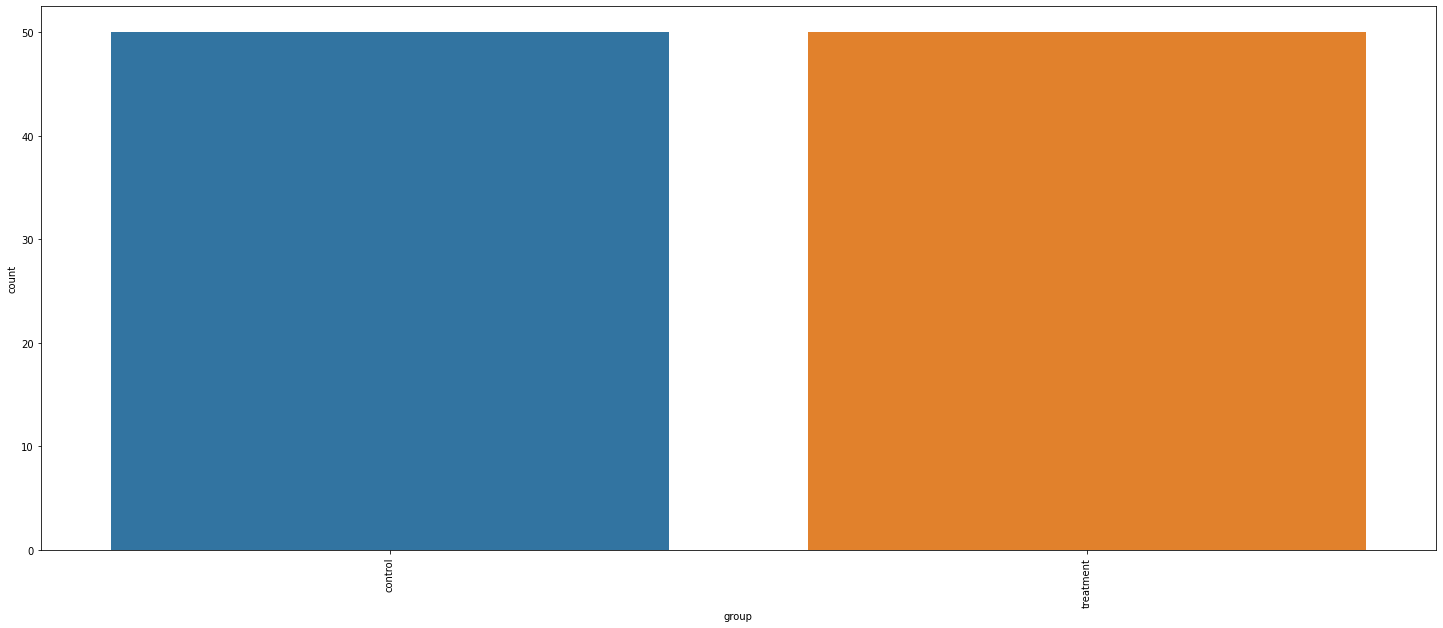

In [240]:
#ploting countplot for group to see its distribution
plt.figure(figsize=(25,10));
sns.countplot(data=df, x='group', order=df.group.value_counts().iloc[:100].index,);
plt.xticks(rotation=90);
plt.show();

**Observations:**
As per problem statement we can see that observations are evenly distributed between the 2 groups

**landing_page**

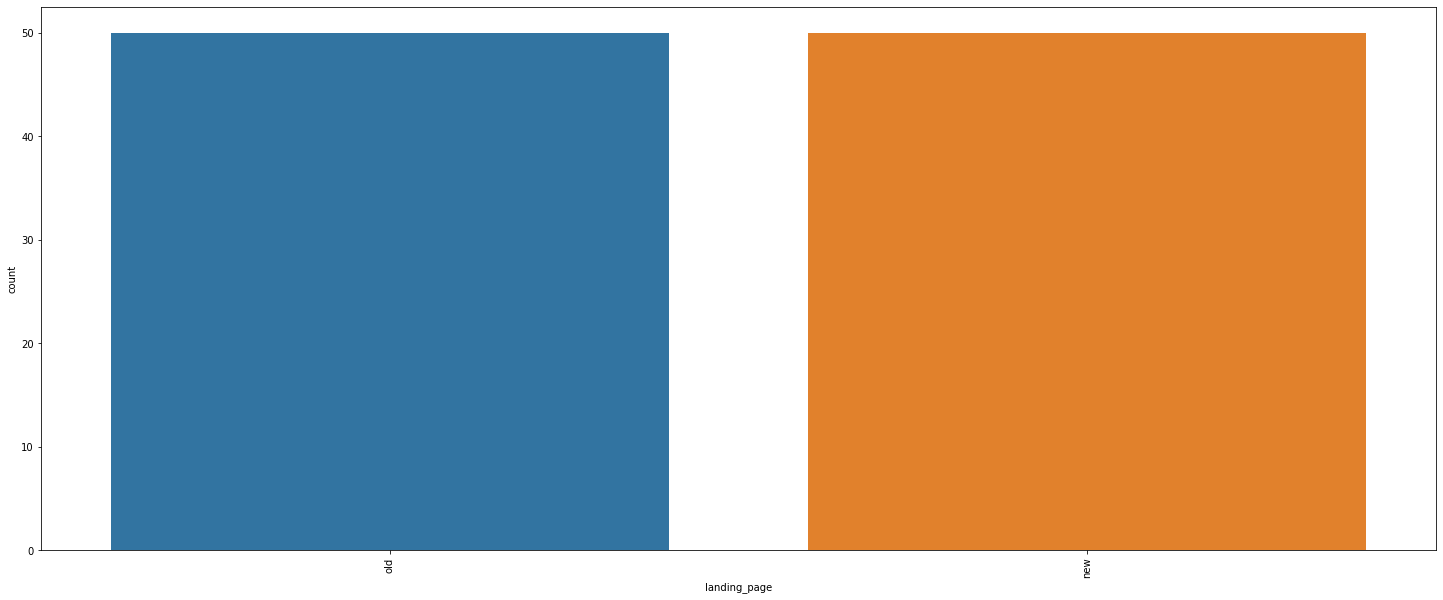

In [241]:
#ploting countplot for landing_page to see its distribution
plt.figure(figsize=(25,10));
sns.countplot(data=df, x='landing_page', order=df.landing_page.value_counts().iloc[:100].index,);
plt.xticks(rotation=90);
plt.show();

**Observations:**
As per problem statement we can see that observations are evenly distributed between the 2 versions of the website

**time_spent_on_the_page**

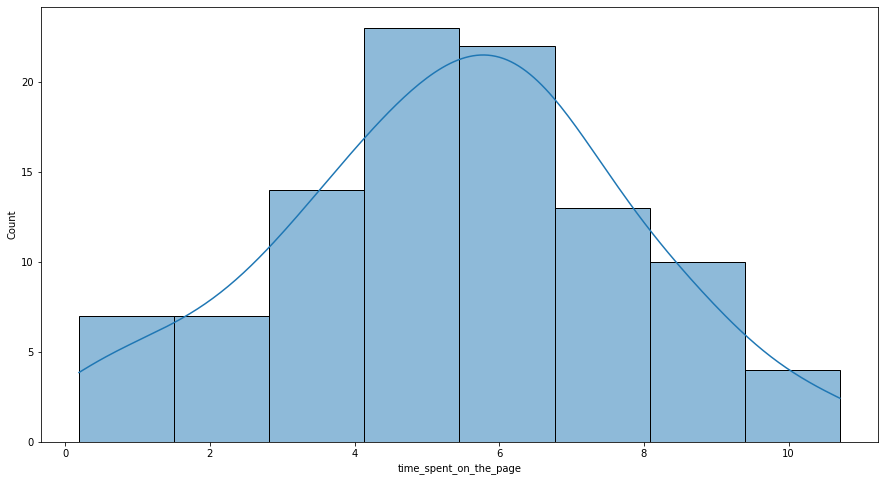

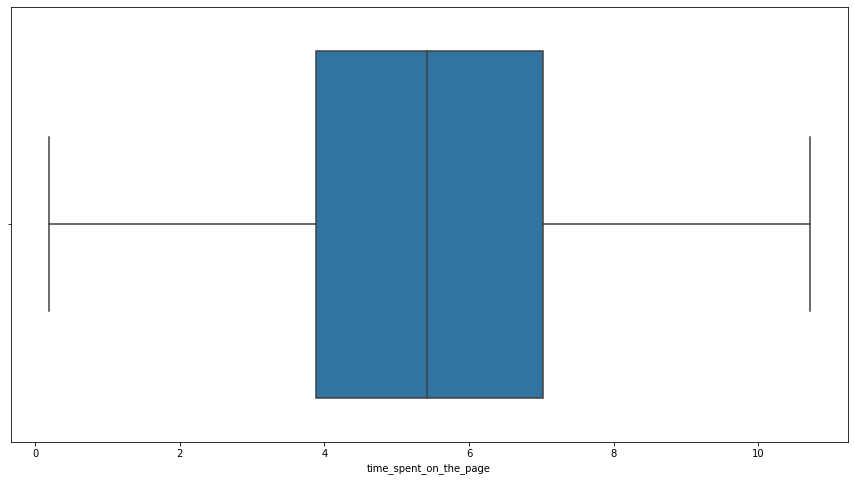

<Figure size 1080x576 with 0 Axes>

In [242]:
#ploting a histogram with density curve for time_spent_on_the_page
plt.figure(figsize=(15,8));
sns.histplot(data=df, x='time_spent_on_the_page', kde=True);
plt.show();

#ploting a boxplot for time_spent_on_the_page
plt.figure(figsize=(15,8));
sns.boxplot(data=df, x='time_spent_on_the_page');
plt.show();
plt.figure(figsize=(15,8));

**Observations:**
*   By the histogram and the kde curve we can say that the data for this field is aproximatelly normally and simetrically distributed with almost no skewness being unimodal
*   By the boxplot we can see that there are no outliers observed in the data of this field, also that data is evenly distributed aproximatelly 50% of the data at the left of the median and the remaining 50% at the right of it.
*   Data has a min value close to 0, a max value close to 11 and a median of aprox 5.5





**converted**

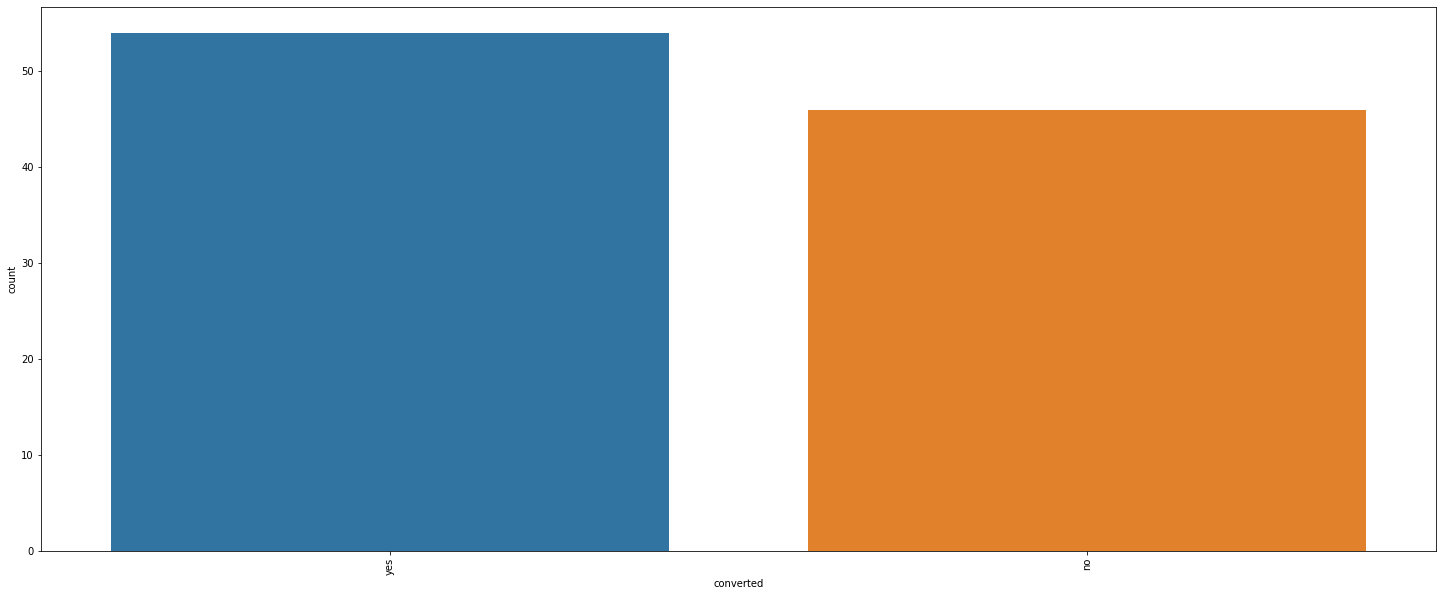

In [243]:
#ploting countplot for converted to see its distribution
plt.figure(figsize=(25,10));
sns.countplot(data=df, x='converted', order=df.converted.value_counts().iloc[:100].index,);
plt.xticks(rotation=90);
plt.show();

**Observations:**
*   We can observe the only 2 posible values for this field(yes and no)
*   aprox 55% of the users were converted, while 45% of them were not converted.

**language_preferred**

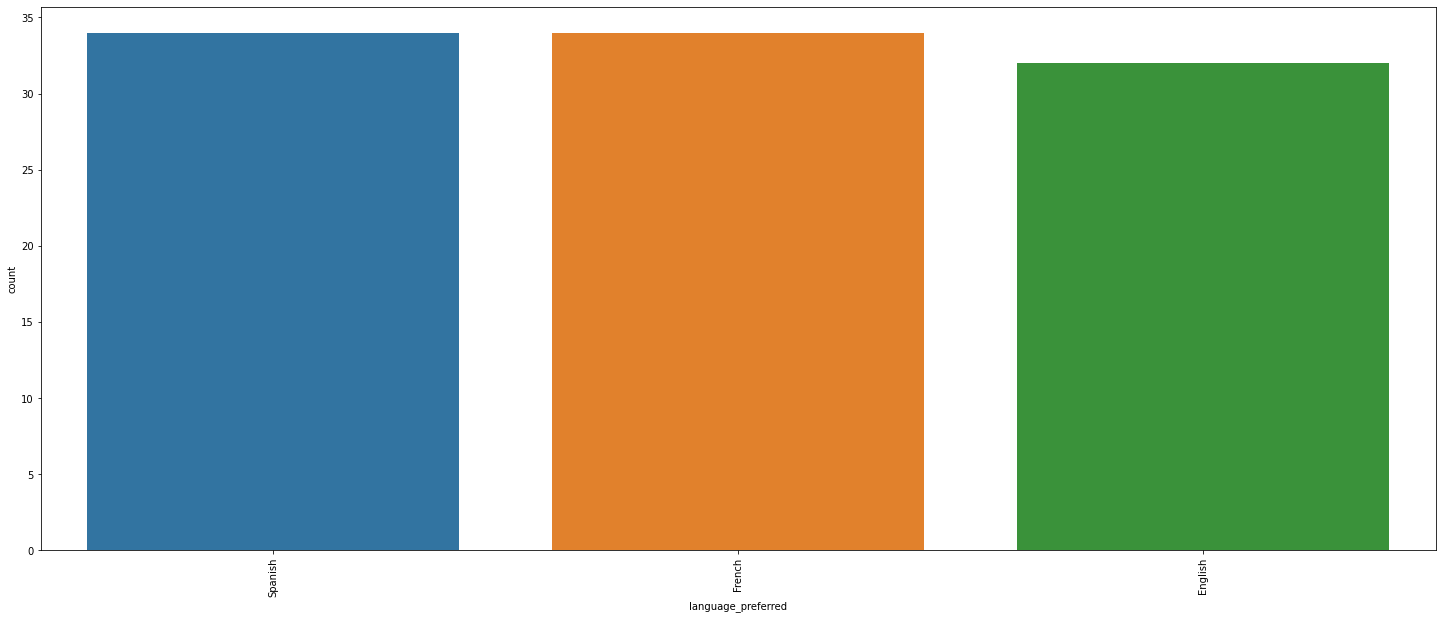

In [244]:
#ploting countplot for language_preferred to see its distribution
plt.figure(figsize=(25,10));
sns.countplot(data=df, x='language_preferred', order=df.language_preferred.value_counts().iloc[:100].index,);
plt.xticks(rotation=90);
plt.show();

**Observations:**
*   We can observe the 3 possible values for the field(Spanish, French and English).
*   Roughly speaking we can say that the data is almost evenly distributed among the 3 of the languages with aprox 33% on each one of them.




### Bivariate Analysis

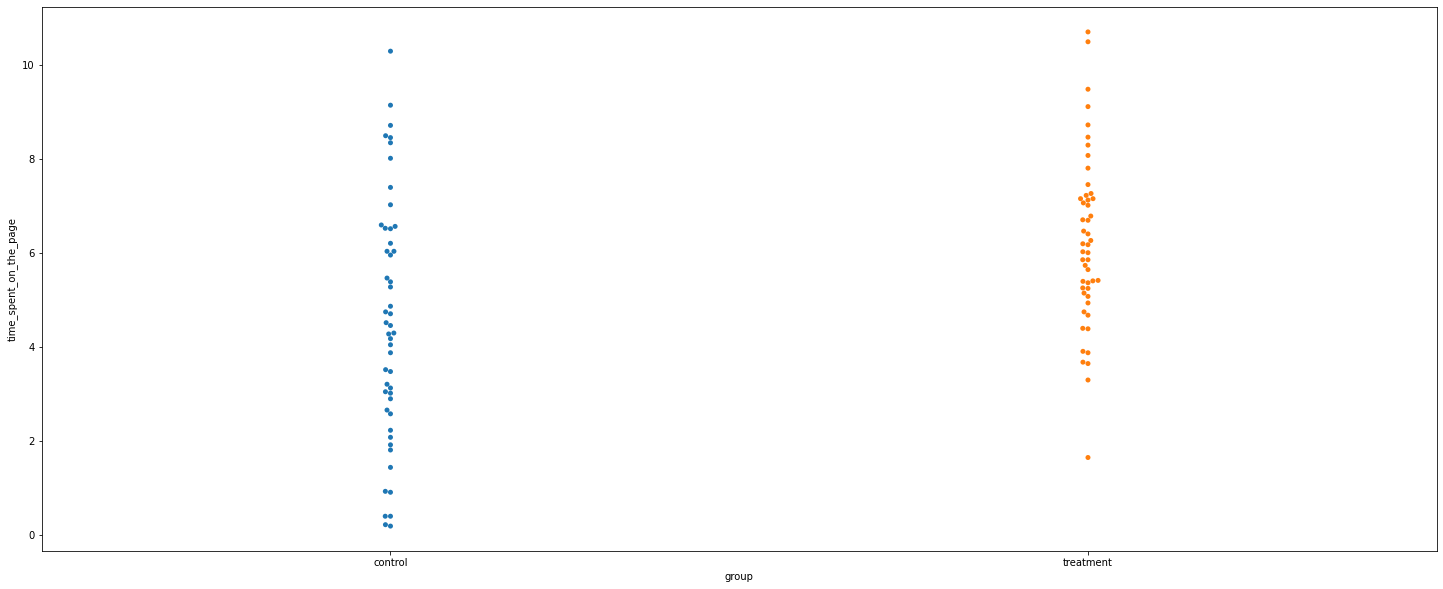

In [245]:
#ploting pairplot to check correlation between time_spent_on_the_page and group
plt.figure(figsize=(25,10));
sns.swarmplot(data=df, x='group',y='time_spent_on_the_page');
plt.show();

**Observations:**
We can see that time spent on the webpage increases in the treatment group that uses new version of the web page being in most of the cases >=4 min while in the control group that uses the old website some users stop using it after 1 or 2 minutes. Data for treatment group is more concentreted among the median

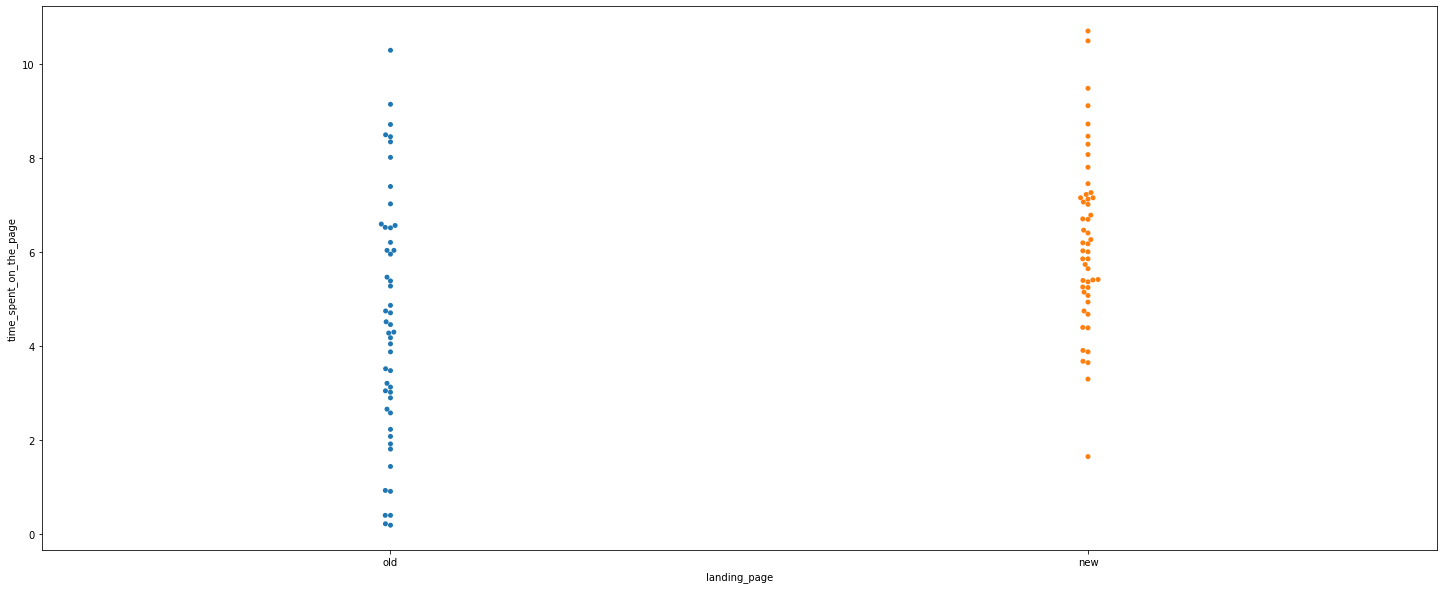

In [246]:
#ploting pairplot to check correlation between time_spent_on_the_page and landing_page
plt.figure(figsize=(25,10));
sns.swarmplot(data=df, x='landing_page',y='time_spent_on_the_page');
plt.show();

**Observations:**
We can see that time spent on the webpage increases in the new version of the web page being in most of the cases >=4 min while in the old website some users stop using it after 1 or 2 minutes. Data for new web site is more concentreted among the median

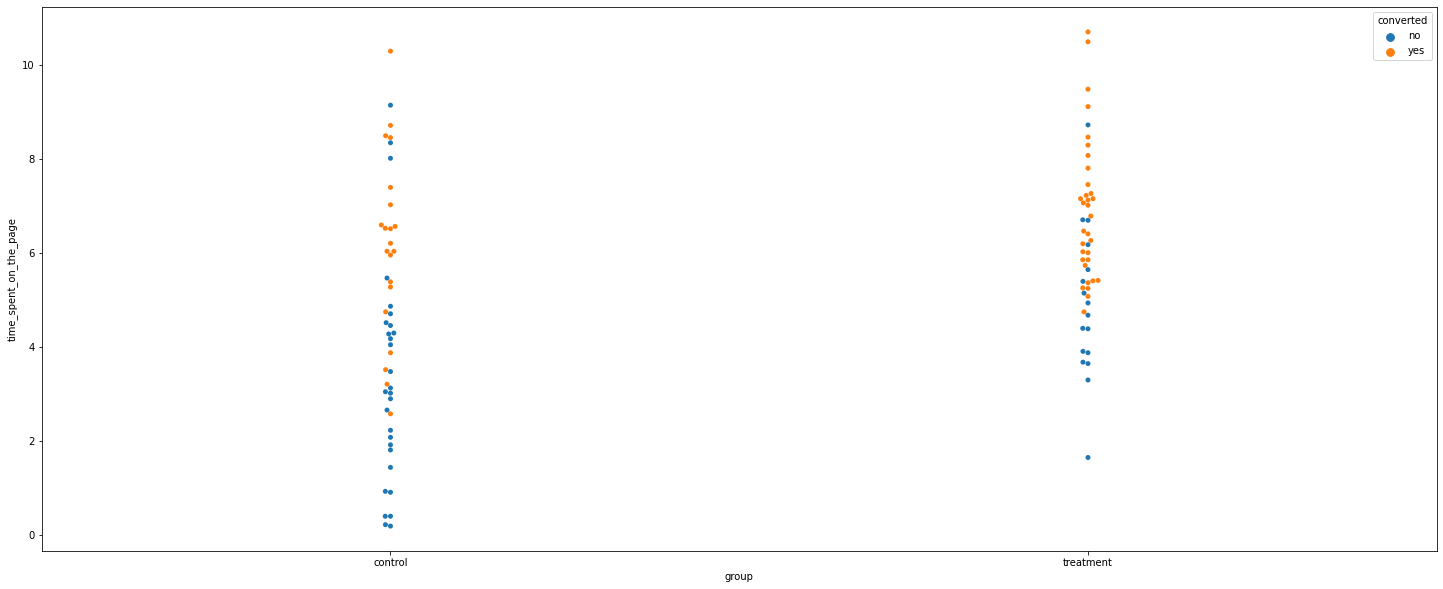

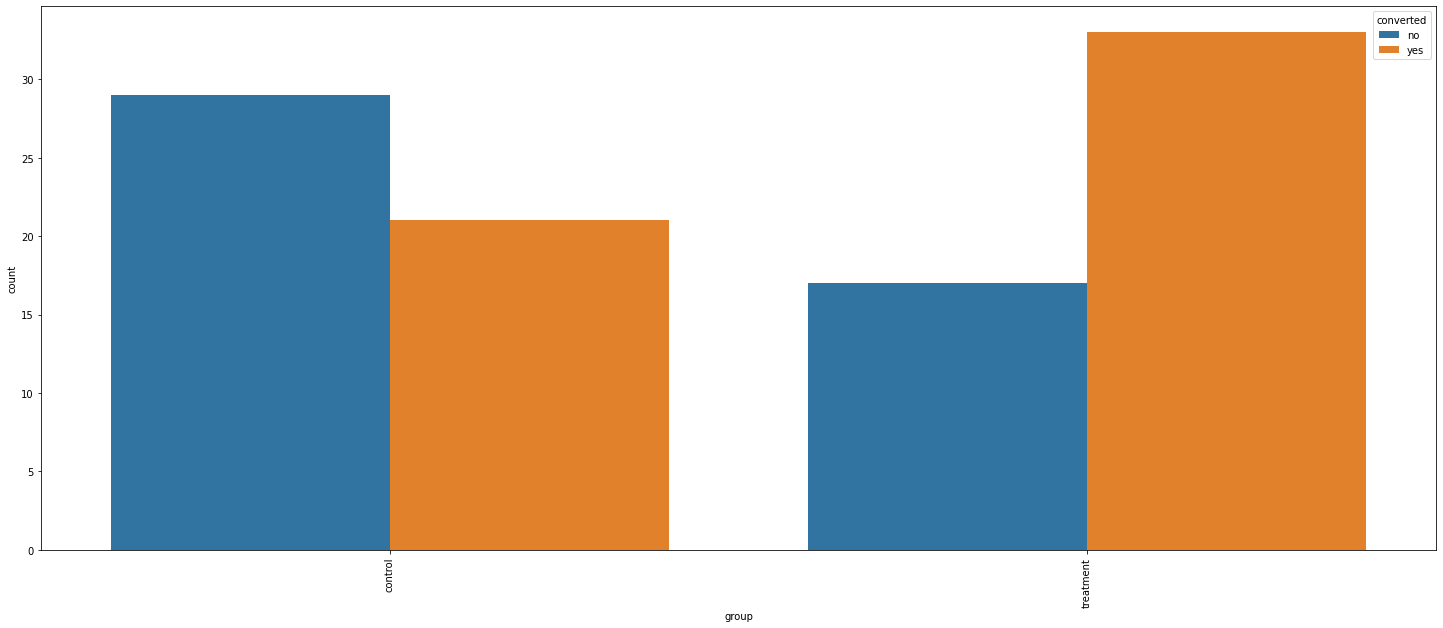

In [247]:
#ploting pairplot to check correlation between time_spent_on_the_page and converted
plt.figure(figsize=(25,10));
sns.swarmplot(data=df, x='group',y='time_spent_on_the_page', hue='converted');
plt.show();

#ploting countplot for converted to see its distribution
plt.figure(figsize=(25,10));
sns.countplot(data=df, x='group', hue='converted', order=df.group.value_counts().iloc[:100].index,);
plt.xticks(rotation=90);
plt.show();

**Observations:**
We can that in general say that most of the converted users are the ones with more than 4 minutes of usage in the website. So, the most a user use the website the pronest to be converted. This applies to both groups(control and treatment), however we can see that the conversion rate is higher for the new version of the website going from 40% in the old to 68% in the new one.

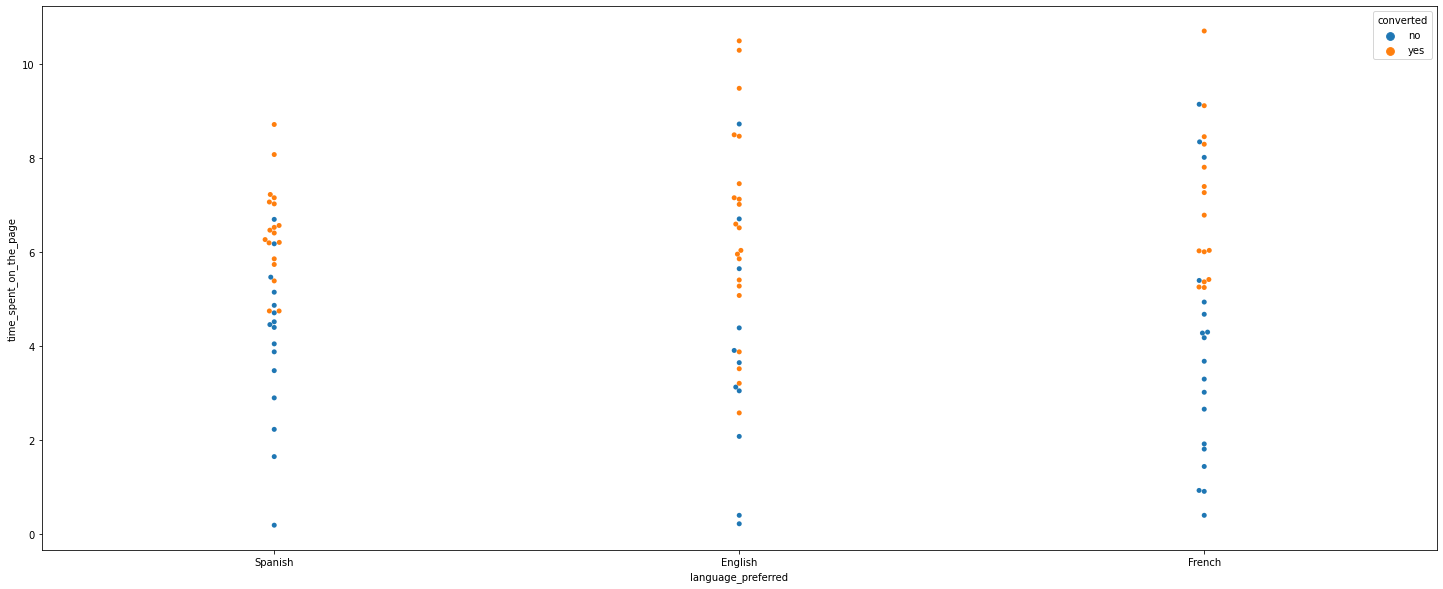

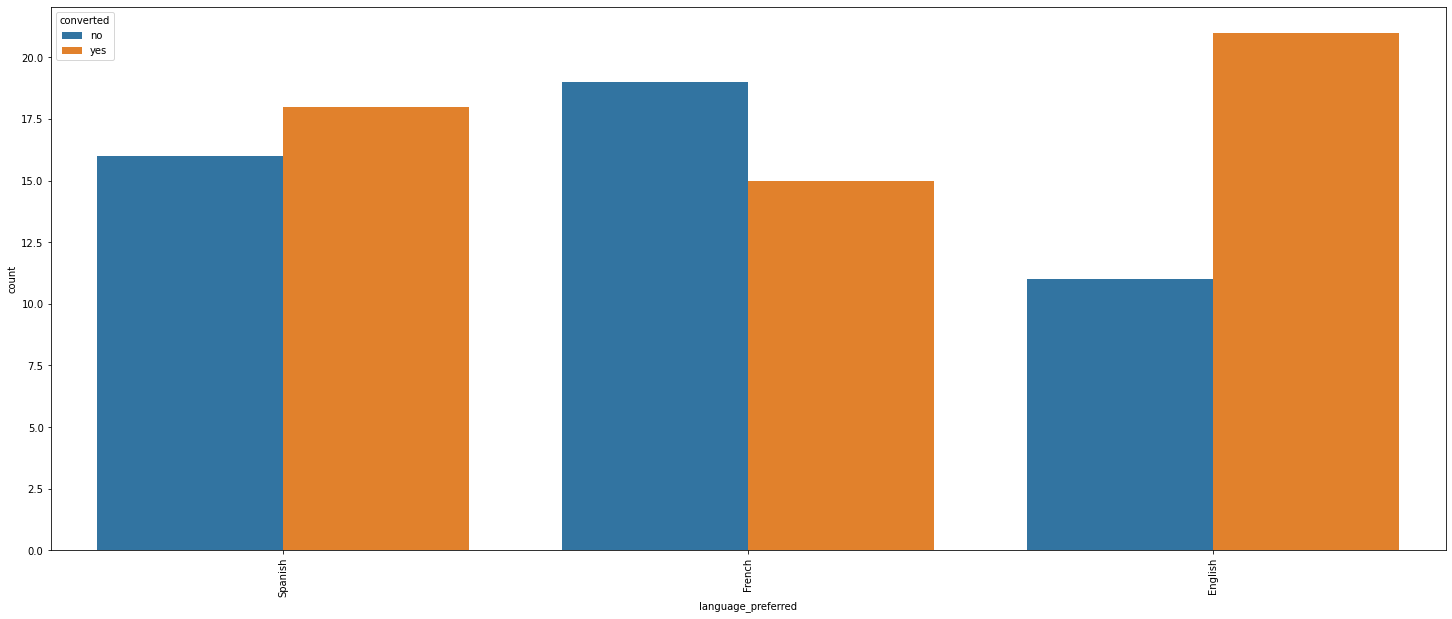

In [248]:
#ploting pairplot to check correlation between time_spent_on_the_page and language_preferred
plt.figure(figsize=(25,10));
sns.swarmplot(data=df, x='language_preferred',y='time_spent_on_the_page', hue='converted');
plt.show();

#ploting countplot for converted to see its distribution
plt.figure(figsize=(25,10));
sns.countplot(data=df, x='language_preferred', hue='converted', order=df.language_preferred.value_counts().iloc[:100].index,);
plt.xticks(rotation=90);
plt.show();

**Observations:**
It is very clear that the conversion rate is higher for users that accessed the english version of  the website. Users accessing the French version have the lowest conversion rate.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

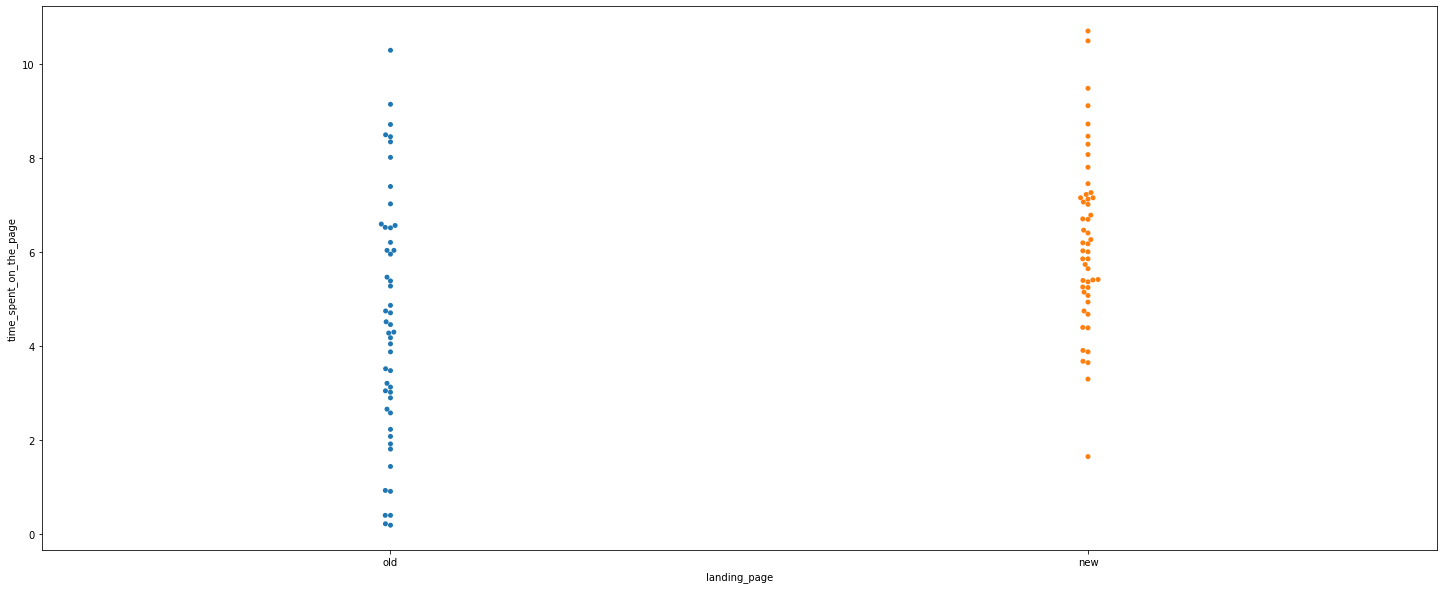

In [249]:
#ploting pairplot to check relationship between time_spent_on_the_page and landing_page
plt.figure(figsize=(25,10));
sns.swarmplot(data=df, x='landing_page',y='time_spent_on_the_page');
plt.show();

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis
Let $\mu_1, \mu_2$ be the mean of usage time of new landing page and old landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test


### Let's test whether the Z-test assumptions are satisfied or not

* Continuous data - it has been already verified previously.
* Normally distributed populations or Sample sizes > 30 - Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
* Independent populations - As we are taking samples for two landing pages, the two samples are from two independent populations.
* Known population standard deviation $\sigma_1$ and $\sigma_2$ - Yes, we know the population standard deviations of both the populations.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

We can use two sample Z-test for this problem.

### Step 3: Decide the significance level
**Note that significance level value will be the same for all the tests in this project**

Test will be performed at 0.05 level of significance as per the request in the original problem statement

### Step 4: Collect and prepare data

In [250]:
#calculating mean and standard deviation for the time spent for new and old landing page
df.groupby(['landing_page'])['time_spent_on_the_page'].aggregate(['std','mean']).reset_index().sort_values('std', ascending=False)

,landing_page,std,mean
1,old,2.581975,4.5324
0,new,1.817031,6.2232


In [251]:
#preparind data and getting stats/variables 
# X1 - first of the two independent samples (sample 1)
# X2 - second of the two independent samples (sample 2)
# pop_sd1 - population standard deviation of sample 1
# pop_sd2 - population standard deviation of sample 2
# n1 - size of sample 1
# n2 - size of sample 2
df_old=df[df['landing_page']=='old']
df_new=df[df['landing_page']=='new']
X1=df_new['time_spent_on_the_page']
X2=df_old['time_spent_on_the_page']
pop_sd1=df_new['time_spent_on_the_page'].std()
pop_sd2=df_old['time_spent_on_the_page'].std()
n1=50
n2=50

### Step 5: Calculate the p-value

**We will use a user predifined function used in the Hands On notebook for week 3.**

In [252]:
# user-defined function to compare the equality of two means from two independent populations, where population standard deviations are known
# this function returns the p-value for one tailed test
# for two-tailed test, multiply the p-value by 2
# To know more about the derivation of test statistic and standard error formula, please refer to the monographs and additional materials
def ztest_2samp(X1, X2, pop_sd1, pop_sd2, n1, n2):
    '''
    X1 - first of the two independent samples (sample 1)
    X2 - second of the two independent samples (sample 2)
    pop_sd1 - population standard deviation of sample 1
    pop_sd2 - population standard deviation of sample 2
    n1 - size of sample 1
    n2 - size of sample 2
    '''
    from numpy import sqrt, abs # import the required functions
    from scipy.stats import norm # import the required function
    se = sqrt(pop_sd1**2/n1 + pop_sd2**2/n2) # calculate the standard error. 
    test_stat = ((X1.mean() - X2.mean()) - 0)/ se # calculate the test statistic
    '''
    For the problem at hand, the null hypothesis is that the two population means are equal, i.e., mu_1 = mu_2.
    Thus, the difference (mu_1 - mu_2) becomes zero.
    '''
    pval = 1 - norm.cdf(abs(test_stat)) # calculate the one-tailed p-value
    '''
    The abs() function is used to calculate the absolute value of the input. 
    For example, abs(-5) = 5.
    '''
    return pval # return the p-value

In [253]:
# find the p-value using the user defined ztest_2samp() function
p_value = ztest_2samp(X1, X2, pop_sd1, pop_sd2, n1 ,n2)
print('The P-value is', p_value)

The P-value is 7.630904034416908e-05


### Step 6: Compare the p-value with $\alpha$

In [254]:
if(p_value>0.05):
  print('p_value is greater than the significance of level')
else:
  print('p_value is lower than the significance of level')

p_value is lower than the significance of level


### Step 7:  Draw inference

As the p-value is much lower than the significance of level we reject the null hypothesis. We have enough statistical difference to infer that users spend more time on the new landing page than the existing landing page 

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

**Perform Visual Analysis**

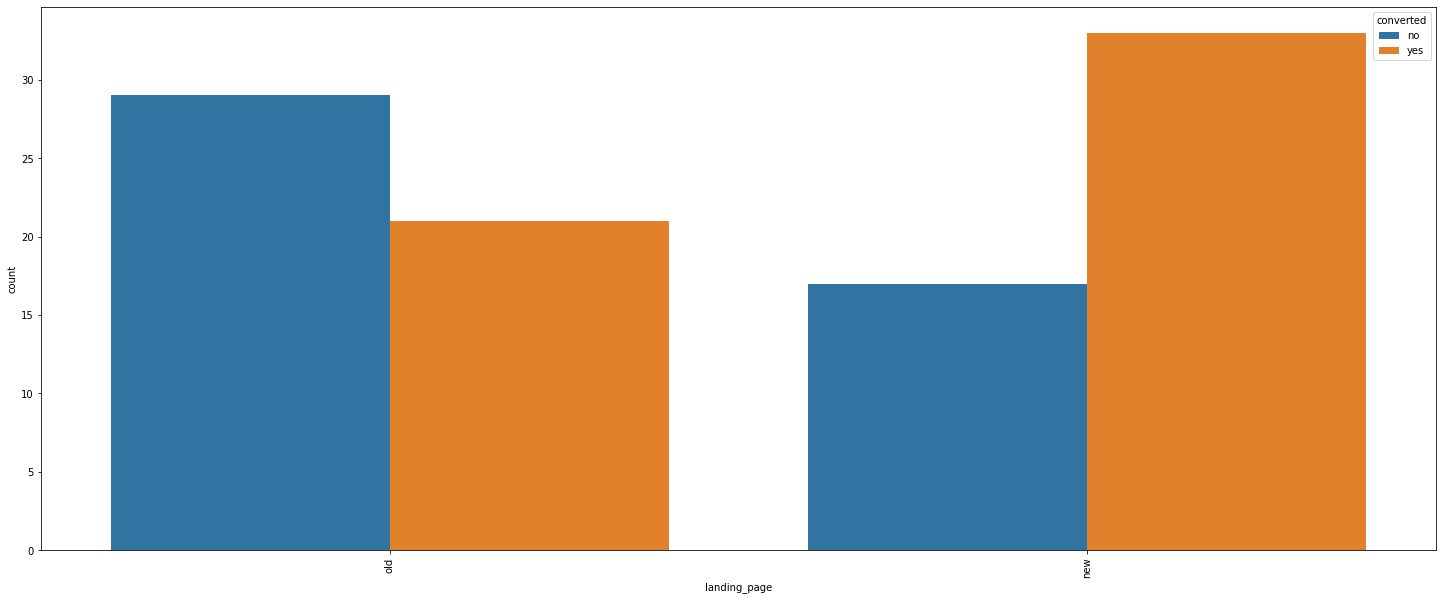

In [255]:
#ploting countplot for converted to see its distribution
plt.figure(figsize=(25,10));
sns.countplot(data=df, x='landing_page', hue='converted', order=df.landing_page.value_counts().iloc[:100].index,);
plt.xticks(rotation=90);
plt.show();

In [256]:
df.groupby(['converted', 'landing_page']).count()['user_id'].reset_index().sort_values('user_id', ascending=False)

,converted,landing_page,user_id
2,yes,new,33
1,no,old,29
3,yes,old,21
0,no,new,17


**Observations:**
As per the data sample we have we could initially say that the conversion rate for the old website is aprox 40% while the conversion rate for the new website is aprox 66%

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions/conversion rate of new landing page and old landing page respectively.

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 >\ p_2$

### Step 2: Select Appropriate test

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user gets converted or does not get converted
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $


### Step 3: Decide the significance level

Test will be performed at 0.05 level of significance as per the request in the original problem statement

### Step 4: Calculate the p-value

In [257]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted users
converted_users = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted_users, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Step 5:  Draw inference

As the p-value is much lower than the significance of level(0.05) we reject the null hypothesis. Hence, we can say that we have enough statistical evidence to infer that the conversion rate (the proportion of users who visit the landing page and get converted) for the new page is greater than the conversion rate for the old page

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

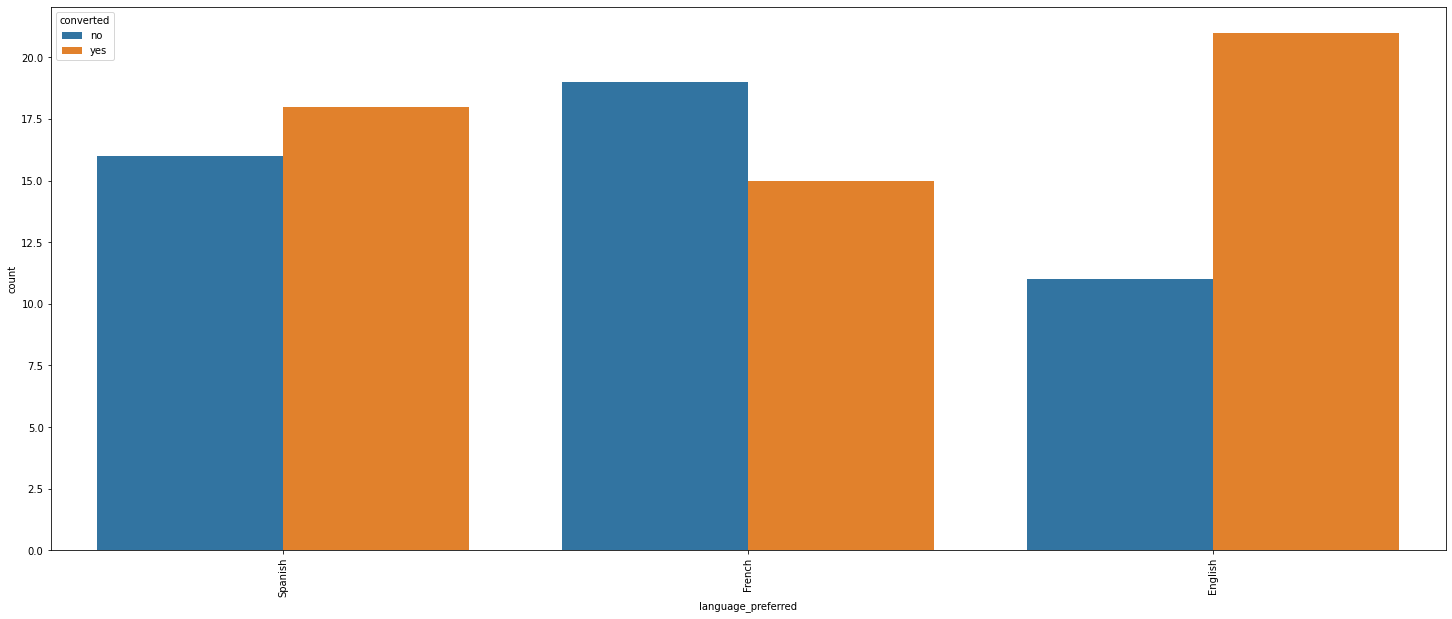

In [258]:
#ploting countplot for converted to see its distribution
plt.figure(figsize=(25,10));
sns.countplot(data=df, x='language_preferred', hue='converted', order=df.language_preferred.value_counts().iloc[:100].index,);
plt.xticks(rotation=90);
plt.show();

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ conversion depends on preferred language.

### Step 2: Select Appropriate test

As we are trying to check the independance between 2 categorical variables we must use the **Chi Square Test for Independence**

In [259]:
#Checking number of observations for each level
df.groupby(['converted', 'language_preferred']).count()['user_id'].reset_index().sort_values('user_id', ascending=False)

,converted,language_preferred,user_id
3,yes,English,21
1,no,French,19
5,yes,Spanish,18
2,no,Spanish,16
4,yes,French,15
0,no,English,11


### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 3: Calculate the p-value

In [260]:
# import the required function
from scipy.stats import chi2_contingency

#Creating contingency table
contingencyT=pd.crosstab(df['language_preferred'],
                            df['converted'], 
                               margins = False)
# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingencyT)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


As the p-value is much higher than the significance level, we fail to reject the null hypothesis. Hence, we do have enough statistical significance to conclude that conversion is independent of preferred language at 5% significance level.

## 4. Is the time spent on the new page same for the different language users?

### Step 1: Define the null and alternate hypotheses


### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent in the new page for different language users; English, Spanish and French respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one mean of time spent in the new page for the different languages is different from the rest.

In [261]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


### Insight
As the p-value is much higher than the significance level, we fail to reject the null hypothesis. Hence, we do have enough statistical significance to conclude that 

However, we don't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests are used to test the differences between all pairs of means.

## Conclusion and Business Recommendations

Conclusions:
* The average time spent on the website is substantially higher in the new website compared to the old website.
*   It is observed that as the time usage increases; users are prone to be converted
*   


Conversion rate is higher in the new



___